# Plot of binary entropy function

E(log(p)) = sum( p * log(p))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.01,1,0.01)
y = - x * np.log(x)/np.log(2)   - (1-x) * np.log(1-x)/np.log(2)

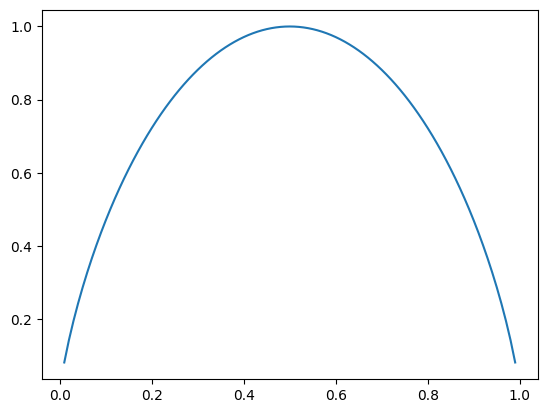

In [ ]:
plt.plot(x,y)

# Decision Trees - Categorization


A decision tree starts at the root, and branches out into different decisions based on a single criteria at each level.

To decide whether and how to branch, we need a measure of goodness.


## Entropy

![](https://media-exp1.licdn.com/dms/image/C5112AQFeZcTPJpfHaw/article-cover_image-shrink_600_2000/0/1559924209243?e=1659571200&v=beta&t=BSnklB2ZomMRlcqfs1Zq2gcAt8v98m_a9SBhPTQqt_8)

## Vs Gini
![](https://pbs.twimg.com/media/ECoDmPPXUAA3Yb2.jpg)

1. Entropy has a better scientific meaning and will probably lead to better results. But it is harder/slower to calculate.
2. Gini is faster and is the default, and the results are not that far off.


The feature selected to split at each level is based on the feature that gives the most gain.

![](https://imgs.developpaper.com/imgs/417320604-d4169bbd592675c5_article732.png)

In the case of continuous variables, the algorithm also tries various thresholds and decides the best one.

# Trading the close Case Study


## Overview

In this competition, you are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and the closing auction of the stock. Information from the auction can be used to adjust prices, assess supply and demand dynamics, and identify trading opportunities.

## Description
Stock exchanges are fast-paced, high-stakes environments where every second counts. The intensity escalates as the trading day approaches its end, peaking in the critical final ten minutes. These moments, often characterised by heightened volatility and rapid price fluctuations, play a pivotal role in shaping the global economic narrative for the day.

Each trading day on the Nasdaq Stock Exchange concludes with the Nasdaq Closing Cross auction. This process establishes the official closing prices for securities listed on the exchange. These closing prices serve as key indicators for investors, analysts and other market participants in evaluating the performance of individual securities and the market as a whole.

Within this complex financial landscape operates Optiver, a leading global electronic market maker. Fueled by technological innovation, Optiver trades a vast array of financial instruments, such as derivatives, cash equities, ETFs, bonds, and foreign currencies, offering competitive, two-sided prices for thousands of these instruments on major exchanges worldwide.

In the last ten minutes of the Nasdaq exchange trading session, market makers like Optiver merge traditional order book data with auction book data. This ability to consolidate information from both sources is critical for providing the best prices to all market participants.

In this competition, you are challenged to develop a model capable of predicting the closing price movements for hundreds of Nasdaq listed stocks using data from the order book and the closing auction of the stock. Information from the auction can be used to adjust prices, assess supply and demand dynamics, and identify trading opportunities.

Your model can contribute to the consolidation of signals from the auction and order book, leading to improved market efficiency and accessibility, particularly during the intense final ten minutes of trading. You'll also get firsthand experience in handling real-world data science problems, similar to those faced by traders, quantitative researchers and engineers at Optiver.

## Data Set

* stock_id - A unique identifier for the stock. Not all stock IDs exist in every time bucket.
* date_id - A unique identifier for the date. Date IDs are sequential & consistent across all stocks.
* imbalance_size - The amount unmatched at the current reference price (in USD).
* imbalance_buy_sell_flag - An indicator reflecting the direction of auction imbalance.
  * buy-side imbalance; 1
  * sell-side imbalance; -1
  * no imbalance; 0
* reference_price - The price at which paired shares are maximized, the imbalance is minimized and the distance from the bid-ask midpoint is minimized, in that order. Can also be thought of as being equal to the near price bounded between the best bid and ask price.
* matched_size - The amount that can be matched at the current reference price (in USD).
* far_price - The crossing price that will maximize the number of shares matched based on auction interest only. This calculation excludes continuous market orders.
* near_price - The crossing price that will maximize the number of shares matched based auction and continuous market orders.
* [bid/ask]_price - Price of the most competitive buy/sell level in the non-auction book.
* [bid/ask]_size - The dollar notional amount on the most competitive buy/sell level in the non-auction book.
* wap - The weighted average price in the non-auction book.
* seconds_in_bucket - The number of seconds elapsed since the beginning of the day's closing auction, always starting from 0.
* target - The 60 second future move in the wap of the stock, less the 60 second future move of the synthetic index. Only provided for the train set.
The synthetic index is a custom weighted index of Nasdaq-listed stocks constructed by Optiver for this competition.

The unit of the target is basis points, which is a common unit of measurement in financial markets. A 1 basis point price move is equivalent to a 0.01% price move.
Where t is the time at the current observation, we can define the target:


In [ ]:
!gdown 1blPZGYMi2HA1ZbiEoAxlORjpDS2ERtUd

Downloading...
From: https://drive.google.com/uc?id=1blPZGYMi2HA1ZbiEoAxlORjpDS2ERtUd
To: /content/train.csv
100% 641M/641M [00:11<00:00, 57.1MB/s]


In [ ]:
import pandas as pd
df=pd.read_csv('train.csv')

In [ ]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,up_a_lot
90783,194,8,330,0.000000e+00,0,1.003631,1.007033e+07,1.003631,1.003631,1.003631,21975.00,1.004042,199834.56,1.003671,12.190342,473,8_330_194,1
837033,132,78,380,0.000000e+00,0,0.998890,1.541306e+07,0.998890,0.998890,0.998846,12689.05,0.999279,230.81,0.999272,-0.470281,4328,78_380_132,0
3399111,76,313,450,8.915893e+05,1,0.998521,9.798346e+06,1.013736,1.006433,0.998369,34778.60,0.998521,44168.99,0.998436,6.489754,17260,313_450_76,1
2244853,58,208,250,1.091474e+08,-1,0.993168,3.242570e+08,0.999930,0.999628,0.993073,14159.98,0.993717,40840.52,0.993239,-9.610057,11465,208_250_58,0
4890425,45,449,220,3.859612e+07,-1,0.998608,1.334079e+09,0.999930,0.999628,0.998608,31395.00,0.998640,32337.88,0.998624,4.689693,24717,449_220_45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867370,104,265,180,0.000000e+00,0,1.001178,1.571892e+07,0.999930,0.999628,1.000909,136667.20,1.001178,74620.00,1.001083,1.540184,14593,265_180_104,0
1139617,43,106,370,0.000000e+00,0,0.997373,6.302933e+06,0.997373,0.997373,0.997256,37407.39,0.998540,6499.14,0.998350,-0.330210,5867,106_370_43,0
3192429,194,295,10,1.262569e+05,1,1.000043,2.372821e+06,0.999930,0.999628,0.999714,10761.60,1.000043,5656.26,0.999929,0.760555,16226,295_10_194,0
2531099,143,234,330,0.000000e+00,0,0.999019,2.061410e+05,0.999019,0.999019,0.999019,245542.32,1.001940,140448.21,1.000879,0.619888,12903,234_330_143,0


Note: When we split the data for 50k rows in class using `df.head(50000)` we introduced a bug. This is a case data leakage occurs in chronological datasets.

This is because the dataset is chronological, and so we just picked a few days. There is overlap in meaning over these few days, when split into training and test sets. Eg. if 499 stocks in the SP500 is down big on one day, we know the last stock is also down, even though it is technically a seperate data point in the test set.

Hence the decision tree artificially showed a high depth as optimal, as we are still memorizing the test set when we memorized the training set. I fixed this bug, and the optimal depth became more reasonable, along the lines of the thought experiment of 2^N sentries at the corners of an N-dimensional cube, with an inside-hypersphere trying to peek out. The following code will shuffle randomly and choose random days.

`df = df.sample(frac=50_000/len(df), random_state=0)`



In [ ]:
df = df.sample(frac=50_000/len(df), random_state=0) # Small dataset for class


NameError: ignored

<Axes: ylabel='Frequency'>

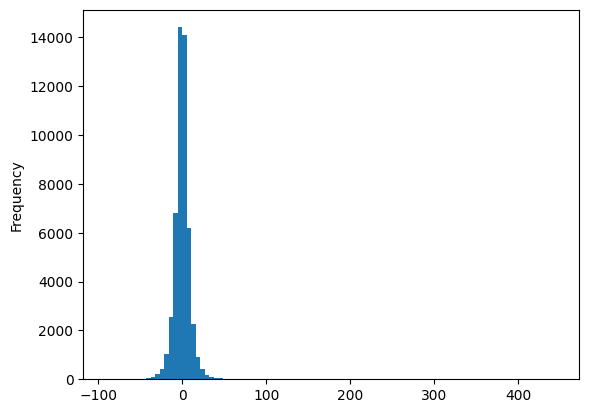

In [ ]:
df.target.plot(kind='hist',bins=100)

In [ ]:
df.target.describe()

count    49999.000000
mean        -0.078412
std          9.449235
min        -91.180210
25%         -4.600287
50%         -0.069737
75%          4.409552
max        446.070430
Name: target, dtype: float64

In [ ]:
# New category - up_a_lot
df['up_a_lot'] = (df['target']>5)+0

In [ ]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id,up_a_lot
90783,194,8,330,0.000000e+00,0,1.003631,1.007033e+07,1.003631,1.003631,1.003631,21975.00,1.004042,199834.56,1.003671,12.190342,473,8_330_194,1
837033,132,78,380,0.000000e+00,0,0.998890,1.541306e+07,0.998890,0.998890,0.998846,12689.05,0.999279,230.81,0.999272,-0.470281,4328,78_380_132,0
3399111,76,313,450,8.915893e+05,1,0.998521,9.798346e+06,1.013736,1.006433,0.998369,34778.60,0.998521,44168.99,0.998436,6.489754,17260,313_450_76,1
2244853,58,208,250,1.091474e+08,-1,0.993168,3.242570e+08,0.999930,0.999628,0.993073,14159.98,0.993717,40840.52,0.993239,-9.610057,11465,208_250_58,0
4890425,45,449,220,3.859612e+07,-1,0.998608,1.334079e+09,0.999930,0.999628,0.998608,31395.00,0.998640,32337.88,0.998624,4.689693,24717,449_220_45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867370,104,265,180,0.000000e+00,0,1.001178,1.571892e+07,0.999930,0.999628,1.000909,136667.20,1.001178,74620.00,1.001083,1.540184,14593,265_180_104,0
1139617,43,106,370,0.000000e+00,0,0.997373,6.302933e+06,0.997373,0.997373,0.997256,37407.39,0.998540,6499.14,0.998350,-0.330210,5867,106_370_43,0
3192429,194,295,10,1.262569e+05,1,1.000043,2.372821e+06,0.999930,0.999628,0.999714,10761.60,1.000043,5656.26,0.999929,0.760555,16226,295_10_194,0
2531099,143,234,330,0.000000e+00,0,0.999019,2.061410e+05,0.999019,0.999019,0.999019,245542.32,1.001940,140448.21,1.000879,0.619888,12903,234_330_143,0


In [ ]:
print(df.columns)

fnames = ['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap']


Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id', 'up_a_lot'],
      dtype='object')


In [ ]:
# Data cleaning

for c in fnames:
  df[c] = df[c].fillna(df[c].mean())

In [ ]:
X = df[fnames]

In [ ]:
y = df['up_a_lot']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape

((40000, 14), (10000, 14))

In [ ]:
X

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap
90783,194,8,330,0.000000e+00,0,1.003631,1.007033e+07,1.003631,1.003631,1.003631,21975.00,1.004042,199834.56,1.003671
837033,132,78,380,0.000000e+00,0,0.998890,1.541306e+07,0.998890,0.998890,0.998846,12689.05,0.999279,230.81,0.999272
3399111,76,313,450,8.915893e+05,1,0.998521,9.798346e+06,1.013736,1.006433,0.998369,34778.60,0.998521,44168.99,0.998436
2244853,58,208,250,1.091474e+08,-1,0.993168,3.242570e+08,0.999930,0.999628,0.993073,14159.98,0.993717,40840.52,0.993239
4890425,45,449,220,3.859612e+07,-1,0.998608,1.334079e+09,0.999930,0.999628,0.998608,31395.00,0.998640,32337.88,0.998624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2867370,104,265,180,0.000000e+00,0,1.001178,1.571892e+07,0.999930,0.999628,1.000909,136667.20,1.001178,74620.00,1.001083
1139617,43,106,370,0.000000e+00,0,0.997373,6.302933e+06,0.997373,0.997373,0.997256,37407.39,0.998540,6499.14,0.998350
3192429,194,295,10,1.262569e+05,1,1.000043,2.372821e+06,0.999930,0.999628,0.999714,10761.60,1.000043,5656.26,0.999929
2531099,143,234,330,0.000000e+00,0,0.999019,2.061410e+05,0.999019,0.999019,0.999019,245542.32,1.001940,140448.21,1.000879


# Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(criterion='gini',class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_train_proba = clf.predict_proba(X_train)[:, 1]  # Probabilities for the positive class

# Model has perfectly memorized the training set
print(metrics.classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31061
           1       1.00      1.00      1.00      8939

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000



![](https://miro.medium.com/v2/resize:fit:1400/1*pOtBHai4jFd-ujaNXPilRg.png)

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      7757
           1       0.26      0.27      0.27      2243

    accuracy                           0.67     10000
   macro avg       0.52      0.52      0.52     10000
weighted avg       0.67      0.67      0.67     10000

ROC AUC Score (Test): 0.5249982024778391


In [ ]:
0.78*0.5+0.27*0.5

0.525

## What is AUC?

![](https://developers.google.com/static/machine-learning/crash-course/images/AUC.svg)


AUC, which stands for "Area Under the Curve," is a metric used in machine learning to evaluate the performance of a classification model. More specifically, it refers to the Area Under the Receiver Operating Characteristic (ROC) Curve. Here's a breakdown of what this means and why it's important:

ROC Curve: The Receiver Operating Characteristic curve is a graphical representation of a classification model's performance. To create this curve, you plot the True Positive Rate (TPR, also known as sensitivity) against the False Positive Rate (FPR, 1 - specificity) at various threshold settings.

True Positive Rate (TPR): This is the ratio of correctly predicted positive observations to all observations in the actual class - true positive / (true positive + false negative).
False Positive Rate (FPR): This is the ratio of incorrectly predicted positive observations to all observations in the actual negative class - false positive / (false positive + true negative).
Thresholds: The ROC curve involves varying the threshold for deciding whether a given prediction is classified as positive or negative. By changing this threshold, you can trade off between TPR and FPR, and each point on the ROC curve represents a different trade-off.

AUC - Area Under the ROC Curve: AUC measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). It provides an aggregate measure of performance across all possible classification thresholds. The value of AUC ranges from 0 to 1.

AUC = 1: This is the ideal case where the classifier is able to perfectly distinguish between all positive and negative cases.
0.5 < AUC < 1: This range is desirable and indicates a model with a good measure of separability. The higher the AUC, the better the model is at distinguishing between positive and negative classes.
AUC = 0.5: This means the model has no class separation capacity, essentially doing no better than random guessing.
AUC < 0.5: This is worse than random guessing, but in practice, by inverting the decisions of the model, you could achieve 1 - AUC.
Advantages of AUC:

Scale-Invariant: It measures how well predictions are ranked rather than their absolute values.
Classification-Threshold-Invariant: It measures the quality of the model's predictions irrespective of what classification threshold is used.
Use Cases: AUC is particularly useful in cases where you have imbalanced classes. For example, in fraud detection or rare disease identification, where the positive class (fraud, disease) is much rarer than the negative class.

In summary, AUC is a widely used metric because it provides a single number that summarizes the performance of a model across all possible classification thresholds, thus giving a sense of the quality of the model's predictions in terms of ranking positive instances higher than negative instances.

### Problem with data mining/overfitting
* Low bias but high variance
* Investing shouldn't depend on "luck"; High variance = useless model under tcost and frictions.
* Solution: Prune tree or early stopping

![](https://www.azquotes.com/picture-quotes/quote-a-model-should-be-as-simple-as-it-can-be-but-no-simpler-albert-einstein-53-15-21.jpg)

![](https://miro.medium.com/max/533/0*ixgk7pTe2E--J7wI.png)

## Hyper-parameter Tuning

* What is the optimal max_depth?


In [ ]:
# train-validation split
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

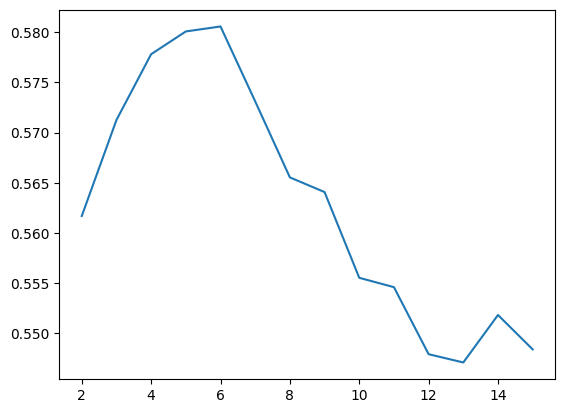

In [ ]:
import matplotlib.pyplot as plt

roc_scores=[]
search_depth=list(range(2,16))
for depth in search_depth:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=depth,class_weight='balanced')
  clf.fit(X_train2, y_train2)

  y_pred = clf.predict_proba(X_validation)[:, 1]
  roc_scores.append(roc_auc_score(y_validation, y_pred))
plt.plot(search_depth,roc_scores)


In [ ]:
import numpy as np
maxidx=np.argmax(roc_scores)
search_depth[maxidx],roc_scores[maxidx]

(6, 0.5805745320795205)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(criterion='gini',max_depth=search_depth[maxidx],class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.59      0.68      7757
           1       0.28      0.55      0.37      2243

    accuracy                           0.58     10000
   macro avg       0.55      0.57      0.53     10000
weighted avg       0.70      0.58      0.61     10000

ROC AUC Score (Test): 0.5880399628690259


In [ ]:
!pip install pydotplus

In [ ]:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=2,class_weight='balanced')
  clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=2)

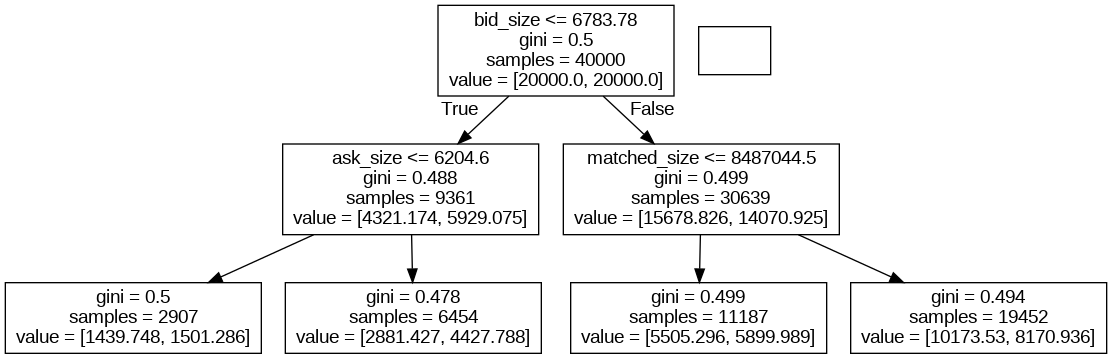

In [ ]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(clf, out_file=None,
                            feature_names=fnames)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# Feature Engineering?

Feature engineering is not strictly required for decision trees, but it can significantly enhance their performance and effectiveness. Decision trees are a type of machine learning algorithm that can work directly with raw data. They are particularly good at handling non-linear relationships and can naturally model interactions between features without explicit engineering. Here are some points to consider:

Automatic Feature Interactions: Decision trees inherently capture interactions between features by splitting nodes based on feature values. This capability means they can often handle complex datasets without the need for manual feature interaction creation.

Handling Different Types of Data: Decision trees can handle both numerical and categorical data, although the way they are handled can depend on the specific implementation (like CART, C4.5, etc.).

Robustness to Unnormalized Data: Unlike many other algorithms, decision trees do not require feature scaling (like normalization or standardization) to perform well.

Benefits of Feature Engineering: Despite the above points, feature engineering can still benefit decision tree models. Creating new features or transforming existing ones can help in uncovering patterns that are not immediately obvious. For instance, creating a feature that represents a ratio or a difference between two features might be more informative for the model.

Dimensionality Reduction: Sometimes, reducing the dimensionality of the data (e.g., through PCA, feature selection techniques) before applying a decision tree can help in dealing with very high-dimensional data, although decision trees are generally quite robust to high dimensionality.

Handling Missing Values: Some decision tree implementations can handle missing values, but in other cases, creating features that capture information about missingness can be helpful.

In summary, while decision trees don't necessarily require feature engineering, applying thoughtful feature engineering can improve model performance, especially in complex or high-dimensional datasets. The decision to engage in feature engineering should be based on the specific characteristics of the dataset and the problem at hand.








In [ ]:
X.std().sort_values()

wap                        2.480305e-03
bid_price                  2.489946e-03
ask_price                  2.492341e-03
reference_price            2.518117e-03
near_price                 8.180212e-03
far_price                  1.264150e-02
imbalance_buy_sell_flag    8.845520e-01
stock_id                   5.797507e+01
date_id                    1.387084e+02
seconds_in_bucket          1.593500e+02
bid_size                   9.375238e+04
ask_size                   1.299585e+05
imbalance_size             1.955716e+07
matched_size               1.370388e+08
dtype: float64

1. Drop stock_id  <--- no logical linkage
2. Drop date_id   <--- no logical linkage
3. Divide all sizes by matched_size, then drop matched_size <--- normalization


In [ ]:
fnames=[
 'seconds_in_bucket',
 'imbalance_size',
 'imbalance_buy_sell_flag',
 'reference_price',
 'far_price',
 'near_price',
 'bid_price',
 'bid_size',
 'ask_price',
 'ask_size',
 'wap']

In [ ]:
df[['bid_size','ask_size','imbalance_size','matched_size']]

,bid_size,ask_size,imbalance_size,matched_size
90783,21975.00,199834.56,0.000000e+00,1.007033e+07
837033,12689.05,230.81,0.000000e+00,1.541306e+07
3399111,34778.60,44168.99,8.915893e+05,9.798346e+06
2244853,14159.98,40840.52,1.091474e+08,3.242570e+08
4890425,31395.00,32337.88,3.859612e+07,1.334079e+09
...,...,...,...,...
2867370,136667.20,74620.00,0.000000e+00,1.571892e+07
1139617,37407.39,6499.14,0.000000e+00,6.302933e+06
3192429,10761.60,5656.26,1.262569e+05,2.372821e+06
2531099,245542.32,140448.21,0.000000e+00,2.061410e+05


In [ ]:
for c in fnames:
  df[c] = df[c].fillna(df[c].mean())

for c in ['bid_size','ask_size','imbalance_size',]:
  df[c] = df[c]/df['matched_size']

In [ ]:
X = df[fnames]

In [ ]:
y = df['up_a_lot']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape,X_test.shape

((40000, 11), (10000, 11))

In [ ]:
X

,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap
90783,330,0.000000,0,1.003631,1.003631,1.003631,1.003631,0.002182,1.004042,0.019844,1.003671
837033,380,0.000000,0,0.998890,0.998890,0.998890,0.998846,0.000823,0.999279,0.000015,0.999272
3399111,450,0.090994,1,0.998521,1.013736,1.006433,0.998369,0.003549,0.998521,0.004508,0.998436
2244853,250,0.336608,-1,0.993168,0.999930,0.999628,0.993073,0.000044,0.993717,0.000126,0.993239
4890425,220,0.028931,-1,0.998608,0.999930,0.999628,0.998608,0.000024,0.998640,0.000024,0.998624
...,...,...,...,...,...,...,...,...,...,...,...
2867370,180,0.000000,0,1.001178,0.999930,0.999628,1.000909,0.008694,1.001178,0.004747,1.001083
1139617,370,0.000000,0,0.997373,0.997373,0.997373,0.997256,0.005935,0.998540,0.001031,0.998350
3192429,10,0.053210,1,1.000043,0.999930,0.999628,0.999714,0.004535,1.000043,0.002384,0.999929
2531099,330,0.000000,0,0.999019,0.999019,0.999019,0.999019,1.191138,1.001940,0.681321,1.000879


## Hyper-parameter Tuning


In [ ]:
# train-validation split
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

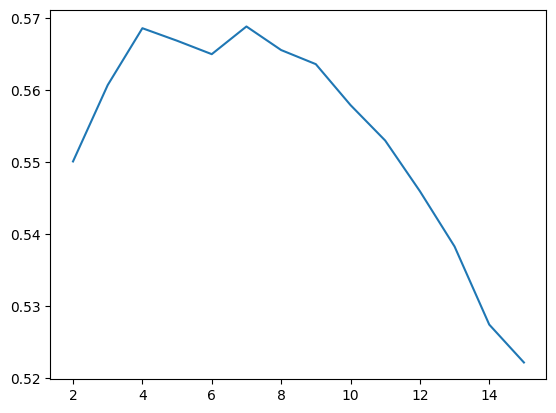

In [ ]:
roc_scores=[]
search_depth=list(range(2,16))
for depth in search_depth:
  clf = DecisionTreeClassifier(criterion='gini',max_depth=depth,class_weight='balanced')
  clf.fit(X_train2, y_train2)

  y_pred = clf.predict_proba(X_validation)[:, 1]
  roc_scores.append(roc_auc_score(y_validation, y_pred))
plt.plot(search_depth,roc_scores)


In [ ]:
maxidx=np.argmax(roc_scores)
search_depth[maxidx],roc_scores[maxidx]

(7, 0.5688768011061555)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(criterion='gini',max_depth=search_depth[maxidx],class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      7757
           1       0.29      0.49      0.37      2243

    accuracy                           0.62     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.70      0.62      0.64     10000

ROC AUC Score (Test): 0.5881604299017796


# Random Forest: Bagging Approach

Random Forest is a popular ensemble learning technique that combines the predictions from multiple decision tree models to produce a more accurate and stable prediction than any single tree. Here's how it works:

Bootstrap Aggregation (Bagging): In a Random Forest, each decision tree is trained on a different sample of the data. These samples are created by bootstrapping, which means randomly selecting data points from the training set with replacement. Each tree gets a slightly different view of the data.

Parallel Training: The individual trees in a Random Forest are trained in parallel, and each tree is built independently. This is a key difference from boosting methods, where models are trained sequentially.

Voting or Averaging: For classification tasks, the final prediction of the Random Forest is typically the class that gets the majority vote from all the trees. For regression tasks, it's usually the average of the predictions from all trees.

Reduction of Variance: Random Forest is particularly effective in reducing variance (overfitting) without increasing bias too much. This is due to the averaging/voting process and the diversity brought by the different samples used to train each tree.

In [ ]:
# train-validation split
X_train2, X_validation, y_train2, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
search_depth[maxidx]

7

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create the random forest classifier
clf = RandomForestClassifier(max_depth=search_depth[maxidx],class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      7757
           1       0.29      0.49      0.37      2243

    accuracy                           0.62     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.70      0.62      0.64     10000

ROC AUC Score (Test): 0.6182532211281013


Decision Trees vs. Random Forest: A single decision tree often requires a greater depth to capture complex patterns in the data since it's just one model. In contrast, Random Forest builds multiple trees and aggregates their results. Each individual tree in a Random Forest doesn't need to be as deep because the ensemble method combines the learning from multiple, possibly simpler, trees. A shallower tree in a Random Forest can reduce the risk of overfitting.

In [ ]:
# In this case, it doesn't seem like a smaller max_depth is better, but it is worth a try
# Create the random forest classifier
clf = RandomForestClassifier(max_depth=6,class_weight='balanced')
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      7757
           1       0.29      0.49      0.37      2243

    accuracy                           0.62     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.70      0.62      0.64     10000

ROC AUC Score (Test): 0.6147536135942909


# What is Boosting?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Ensemble_Boosting.svg/1920px-Ensemble_Boosting.svg.png)
Boosting is an ensemble technique in machine learning that involves building multiple models (usually of the same type) sequentially, where each subsequent model attempts to correct the errors of the previous models. The key principles of boosting include:

Sequential Model Training: Unlike other ensemble methods like Random Forests that train models in parallel, boosting trains models one after the other.

Focus on Mistakes: Each new model in a boosting sequence focuses more on the data points that were incorrectly predicted by the previous models. This is typically achieved by assigning higher weights to the misclassified observations.

Combining Weak Learners: Boosting starts with a base (weak) model and adds new models that are slightly better than random guessing. These models are combined into a strong learner that achieves high accuracy.

Reduction in Bias and Variance: Boosting can reduce both bias (systematic error) and variance (error from sensitivity to small fluctuations in the training set) of the predictive model.

# XGBoost (eXtreme Gradient Boosting)

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194110/leaf.png)


XGBoost, a popular gradient boosting framework, uses a level-wise tree growth strategy, also known as depth-first growth, for several reasons that relate to efficiency, performance, and the nature of gradient boosting itself. Here's an explanation:

Balanced Trees: Level-wise growth ensures that the trees are balanced. Balanced trees are easier to regularize, as they tend to have similar shape and size. This can be advantageous because it prevents overfitting by not allowing any one branch to have too much influence.

Computational Efficiency: In XGBoost, each level of the tree is built one at a time. This allows for certain optimizations in terms of computational efficiency. For example, the data structure can be organized so that the algorithm needs to scan through the dataset only once per level, rather than once per node. This can make the level-wise strategy faster for some datasets and setups, especially when the number of data points is very large.

Regularization and Overfitting: Level-wise growth makes it easier to apply regularization techniques. Regularization parameters in XGBoost, such as max_depth (maximum depth of a tree), can be more straightforwardly implemented and interpreted with level-wise growth. This approach helps in controlling the complexity of the model, thus reducing the risk of overfitting.

Predictive Performance: The level-wise strategy can lead to a more conservative model. By expanding all nodes of a level before moving deeper, the algorithm focuses on reducing errors more uniformly across all leaf nodes. This can sometimes lead to better performance in terms of predictive accuracy, especially in scenarios where the signal-to-noise ratio in the data is not very high.

System Optimization: XGBoost was designed with system optimization in mind. The level-wise strategy aligns well with system-level optimizations, such as cache access patterns, data structure alignment, and efficient use of multi-threading, which are critical for handling large datasets.

Simplicity and Stability: The level-wise approach is conceptually simpler and can be more stable, especially in distributed computing environments where data is split across multiple machines. It ensures that the growth of the tree is more uniform and predictable.

In summary, XGBoost's level-wise tree growth strategy is chosen for its balance of computational efficiency, regularization benefits, and alignment with system-level optimizations. It contributes to the overall effectiveness of XGBoost as a high-performance gradient boosting framework, especially in large-scale and distributed settings.

# XGBoost

* https://xgboost.readthedocs.io/en/stable/

![](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*YMi6k65BWCKrSKZvKsB_Ug.jpeg)

In [ ]:
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score

clf = XGBClassifier(max_depth=6)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      7757
           1       0.29      0.49      0.37      2243

    accuracy                           0.62     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.70      0.62      0.64     10000

ROC AUC Score (Test): 0.5984145251055653


## Hyperpameters

Here are some key hyperparameters and a brief guide on how to approach tuning them:

* Learning Rate (learning_rate): This determines the step size at each iteration while moving toward a minimum of a loss function. A smaller learning rate requires more boosting rounds but can lead to a more accurate model. Common values range from 0.01 to 0.3.

* Number of Estimators (n_estimators): This is the number of boosting rounds or the number of trees to build. Too many trees can lead to overfitting. The optimal number can depend heavily on the other parameters, especially on the learning rate.

* Max Depth (max_depth): Controls the depth of the tree. Shallower trees reduce the risk of overfitting but might not capture enough patterns; deeper trees can capture more complex patterns but might overfit. You might want to try values from 3 to 10.

* Min Child Weight (min_child_weight): This parameter is similar to the min_samples_leaf in RandomForestClassifier and controls overfitting. Higher values reduce overfitting.

* Subsample (subsample): This is the fraction of samples to be used for each tree. Lower values make the algorithm more conservative and prevent overfitting but too small values might lead to underfitting. Typical values range from 0.5 to 1.

* Colsample bytree (colsample_bytree): This parameter is the fraction of features to be used for each tree. A large value means more features will be used, a small value prevents overfitting. Typical values range from 0.3 to 1.


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Adjust these parameters
params = {
    'max_depth': 10,
    'n_estimators': 100,
    'learning_rate': 0.1,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

clf = XGBClassifier(**params)
clf.fit(X_train, y_train)

y_pred_test = clf.predict(X_test)
y_pred_test_proba = clf.predict_proba(X_test)[:, 1]

# Model evaluation on test set
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred_test))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_test_proba))


Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.82      0.65      0.72      7757
           1       0.29      0.49      0.37      2243

    accuracy                           0.62     10000
   macro avg       0.55      0.57      0.54     10000
weighted avg       0.70      0.62      0.64     10000

ROC AUC Score (Test): 0.6058859812870327


## Bayesian Optimization

Bayesian Optimization is an advanced method for finding the optimum of a function that is expensive to evaluate. It's particularly well-suited for hyperparameter tuning in machine learning models, where evaluating the performance of a model with a given set of hyperparameters can be very time-consuming.

Here's an overview of how Bayesian Optimization works:

Probabilistic Model: Bayesian Optimization builds a probabilistic model of the function it's trying to optimize. This model is used to make predictions about the function's behavior and to assess the uncertainty of those predictions. The most common model used is a Gaussian Process, which provides a smooth estimate of the function and a measure of uncertainty around that estimate.

Acquisition Function: It uses an acquisition function to decide where to sample next. The acquisition function trades off exploration (sampling where the model is uncertain) against exploitation (sampling where the model predicts high values). Some common acquisition functions are Expected Improvement, Probability of Improvement, and Upper Confidence Bound.

Iterative Process: The process is iterative. It starts with some initial samples from the function, updates the probabilistic model based on these samples, and then uses the acquisition function to choose the next sample point. This sample is then used to update the model, and the process repeats.

Optimization of Acquisition Function: At each step, Bayesian Optimization needs to optimize the acquisition function to determine the next sampling point. This is much cheaper than evaluating the original function.

Convergence to Optimum: Over successive iterations, the method hones in on the areas of the parameter space that are most promising, as indicated by the model and acquisition function. Ideally, it converges to the global optimum of the function.

In the context of machine learning hyperparameter tuning:

The "function" we want to optimize is the performance of the machine learning model, as measured by some metric like accuracy or area under the ROC curve.
The "expensive to evaluate" aspect comes from the fact that training a model with a set of hyperparameters and evaluating its performance can take a significant amount of time and computational resources.
Bayesian Optimization efficiently navigates the hyperparameter space, finding the best hyperparameters more quickly than grid search or random search methods, especially when the number of hyperparameters is large or when each evaluation of the model performance is very costly.
Overall, Bayesian Optimization is a powerful technique for optimization problems where each function evaluation is expensive, making it a popular choice for hyperparameter tuning in machine learning.

## Configuring XGBoost to Use the GPU:

When you create your XGBoost model, you can specify the tree_method parameter to use GPU-based algorithms.
For classification, you would set tree_method='gpu_hist', which uses a histogram-based algorithm optimized for GPU. This is usually the most efficient option for training on GPUs.

In [ ]:
pip install hyperopt


In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# Define the space of hyperparameters to search
space = {
    'max_depth': hp.choice('max_depth', range(3, 15)),
    'n_estimators': hp.choice('n_estimators', range(50, 300)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'min_child_weight': hp.choice('min_child_weight', range(1, 10)),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'device' : 'cuda' # Enable GPU usage
}

# Objective function to minimize
def objective(params):
    clf = XGBClassifier(**params)
    score = cross_val_score(clf, X_train, y_train, scoring='roc_auc', cv=3).mean()
    return {'loss': -score, 'status': STATUS_OK}

# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)


  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [01:55:21] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)



100%|██████████| 100/100 [03:33<00:00,  2.14s/trial, best loss: -0.6093948226986196]


In [ ]:
from hyperopt import space_eval

# Best parameters
best_params = space_eval(space, best)
print("Best Parameters:", best_params)

# Train and evaluate model with best parameters
clf = XGBClassifier(**best_params)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_proba))

Best Parameters: {'colsample_bytree': 0.9496142713205653, 'device': 'cuda', 'learning_rate': 0.03046732572083103, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 270, 'subsample': 0.8445325560062706}

Test Set Evaluation:
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      7757
           1       0.60      0.00      0.01      2243

    accuracy                           0.78     10000
   macro avg       0.69      0.50      0.44     10000
weighted avg       0.74      0.78      0.68     10000

ROC AUC Score (Test): 0.6278361551797002


In [ ]:
df.shape

(50000, 18)

Decision Trees vs. XGBoost: XGBoost is a gradient boosting method where trees are built sequentially, with each new tree attempting to correct the errors of the previous ones. In XGBoost, trees are generally shallow (often not more than 6 levels deep). Deep trees can lead to overfitting, especially in a boosting framework where each tree builds upon the previous ones.

# LightGBM



![](https://cdn.analyticsvidhya.com/wp-content/uploads/2017/06/11194227/depth.png)

LightGBM, a gradient boosting framework, employs a leaf-wise (also known as best-first) tree growth strategy, rather than a level-wise one. This approach differs from the level-wise strategy used by XGBoost and other traditional gradient boosting methods. Here's why LightGBM uses leaf-wise growth:

Efficiency in Large Datasets: The leaf-wise growth strategy can be more efficient on datasets with large numbers of features or complex patterns. By allowing the tree to grow deep in areas where the data shows significant irregularities, LightGBM can achieve a lower loss compared to level-wise growth, where trees are grown one level at a time and can be shallower.

Better Handling of Overfitting: While leaf-wise growth can potentially lead to overfitting, especially on smaller datasets, LightGBM counters this by implementing other forms of regularization and control. Parameters such as max_depth can limit the depth of the trees, and min_data_in_leaf can control the minimum amount of data needed to make a new split, preventing the model from becoming too complex.

Focus on Areas with Higher Loss: Leaf-wise growth allows the model to focus on observations with higher errors (or gradients in the case of gradient boosting). This can lead to faster convergence on datasets where a minority of the observations are harder to model, as the algorithm will prioritize reducing the largest errors first.

System Optimization: LightGBM is designed with efficiency in mind, particularly for large datasets. The leaf-wise strategy aligns well with the framework's other system-level optimizations, such as Gradient-based One-Side Sampling (GOSS) and Exclusive Feature Bundling (EFB), which are particularly effective for large datasets and sparse features.

Reduced Complexity for Splitting: In leaf-wise growth, at each step, the algorithm only needs to choose the best split from amongst the leaves, as opposed to evaluating all possible splits at a particular level. This can reduce the complexity of the splitting operation, although it might lead to deeper trees.

In summary, LightGBM's leaf-wise tree growth strategy is designed to efficiently handle large datasets and complex patterns, focusing on areas with higher loss for faster convergence. While it risks overfitting, especially on small datasets, LightGBM mitigates this with various regularization techniques and parameters that control tree complexity.

In [ ]:
best_params={'colsample_bytree': 0.9956675451279495,
 'learning_rate': 0.04996293807203951,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 157,
 'subsample': 0.7156379511468921}

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score
from hyperopt import space_eval

print("Best Parameters:", best_params)

# Initialize and train the LightGBM classifier with the best parameters
clf = LGBMClassifier(**best_params)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Model evaluation
print("\nTest Set Evaluation:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score (Test):", roc_auc_score(y_test, y_pred_proba))


Best Parameters: {'colsample_bytree': 0.9956675451279495, 'learning_rate': 0.04996293807203951, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 157, 'subsample': 0.7156379511468921}
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 8939, number of negative: 31061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2353
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.223475 -> initscore=-1.245529
[LightGBM] [Info] Start training from score -1.2